# What to do
- chapter3 of the goose book

# Activation function

## Step function

### Simple

In [4]:
import numpy as np

In [7]:
def step_function(x):
    return(int(x > 0))

In [10]:
step_function(-1)

0

### Take in arrays

In [15]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [16]:
step_function(np.array([-1,1,2]))

array([0, 1, 1])

### Plot'm

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.1, 1.1)

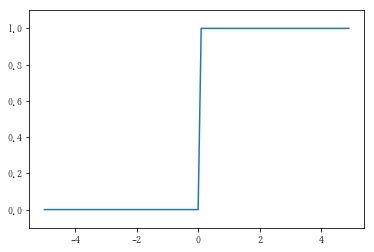

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)

## Sigmoid

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [23]:
x = np.array([-1.0, 1.0, 2.0])

In [24]:
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

In [25]:
t = np.array([1.0, 2.0, 3.0])

In [26]:
1.0 + t

array([ 2.,  3.,  4.])

In [27]:
1.0 / t

array([ 1.        ,  0.5       ,  0.33333333])

(-0.1, 1.1)

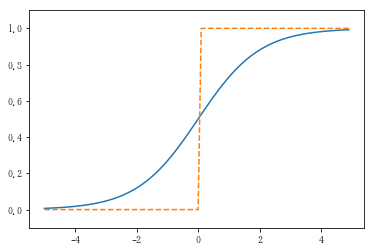

In [29]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.plot(x, step_function(x), linestyle = "--", label = "cos")
plt.ylim(-0.1, 1.1)

## ReLU

In [30]:
def relu(x):
    return np.maximum(0, x)

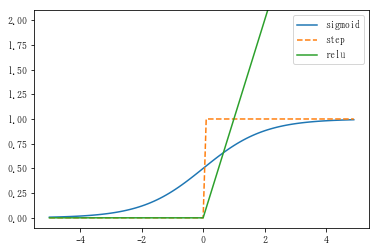

In [33]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y, label = "sigmoid")
plt.plot(x, step_function(x), linestyle = "--", label = "step")
plt.plot(x, relu(x), linestyle = "-", label = "relu")
plt.ylim(-0.1, 2.1)
plt.legend()

# Multi dimentional arrays

## 1D

In [34]:
A = np.array([1,2,3,4])

In [35]:
print(A)

[1 2 3 4]


In [37]:
np.ndim(A)

1

In [38]:
A.shape

(4,)

In [39]:
A.shape[0]

4

## 2D

In [41]:
B = np.array([[1,2], [3,4], [5,6]])

In [42]:
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [43]:
np.ndim(B)

2

In [44]:
B.shape

(3, 2)

## multiplication

In [45]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

## 2D network

In [46]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

## 3D network

### 1st layer

In [47]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1

In [48]:
A1

array([ 0.3,  0.7,  1.1])

In [49]:
Z1 = sigmoid(A1)

In [ ]:
Z1

### 2nd layer

In [58]:
W2 = np.array([[0.1, 0.4], [0.2,0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [59]:
Z2

array([ 0.62624937,  0.7710107 ])

### 3rd layer

In [60]:
def identity_function(x):
    return(x)

In [55]:
np.dot(Z1, W2)

array([ 0.41615984,  1.01402696])

In [56]:
B2

array([ 0.1,  0.2])

In [62]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)
Y = identity_function(A3)

In [63]:
Y

array([ 0.21682708,  0.49627909])

### Summary

In [64]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2,0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [65]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return(y)

In [66]:
network = init_network()

In [67]:
x = np.array([1.0,0.5])

In [68]:
y = forward(network, x)

In [69]:
y

array([ 0.31682708,  0.69627909])

## Output layer

### soft max

#### function

In [70]:
a = np.array([0.3, 2.9, 4.0])

In [71]:
exp_a = np.exp(a)

In [72]:
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [73]:
sum_exp_a = sum(exp_a)

In [74]:
sum_exp_a

74.122154210163302

In [75]:
y = exp_a/sum_exp_a

In [76]:
y

array([ 0.01821127,  0.24519181,  0.73659691])

In [77]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return(y)

#### overflow

In [78]:
a = np.array([1010, 1000, 990])

In [79]:
np.exp(a)

C:\Users\shota.shimizu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


array([ inf,  inf,  inf])

In [80]:
c = np.max(a)

In [81]:
a-c

array([  0, -10, -20])

In [82]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [83]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # for overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return(y)

#### sandbox

In [86]:
a = np.array([0.3, 2.9, 4.0])

In [90]:
y = softmax(a)

In [88]:
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [89]:
np.sum(y)

1.0

# MNIST

## Load

In [120]:
%run mnist.py

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [125]:
from PIL import Image

In [134]:
def img_show(img):
    plt_img = Image.fromarray(np.uint8(img))
    plt_img.show()

In [123]:
(x_train, t_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

In [127]:
img = x_train[0]
label = t_train[0]
label

5

In [128]:
print(img.shape)

(784,)


In [129]:
img = img.reshape(28,28)

In [130]:
print(img.shape)

(28, 28)


In [137]:
img_show(img)

## Code

In [146]:
def get_data():
    (x_train, t_train), (x_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, y_test

In [139]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

In [140]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [147]:
x, t = get_data()

In [148]:
network = init_network()

In [149]:
accuracy_cnt= 0

In [150]:
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    
    if p == t[i]:
        accuracy_cnt +=1

In [151]:
print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352


In [152]:
network

{'W1': array([[-0.00741249, -0.00790439, -0.01307499, ...,  0.01978721,
         -0.04331266, -0.01350104],
        [-0.01029745, -0.01616653, -0.01228376, ...,  0.01920228,
          0.02809811,  0.01450908],
        [-0.01309184, -0.00244747, -0.0177224 , ...,  0.00944778,
          0.01387301,  0.03393568],
        ..., 
        [ 0.02242565, -0.0296145 , -0.06326169, ..., -0.01012643,
          0.01120969,  0.01027199],
        [-0.00761533,  0.02028973, -0.01498873, ...,  0.02735376,
         -0.01229855,  0.02407041],
        [ 0.00027915, -0.06848375,  0.00911191, ..., -0.03183098,
          0.00743086, -0.04021148]], dtype=float32),
 'W2': array([[-0.10694039,  0.01591247, -0.44349867, ...,  0.03561032,
          0.14045963,  0.03964241],
        [ 0.29911557, -0.03322235, -0.08902215, ..., -0.04722451,
         -0.0972147 ,  0.2950258 ],
        [ 0.06576645,  0.63304549,  0.02325344, ...,  0.05046809,
          0.26831996, -0.13252524],
        ..., 
        [-0.18394209, -0.

## What's inside

In [153]:
x, _ = get_data()

In [154]:
network = init_network()

In [155]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [156]:
x.shape

(10000, 784)

In [157]:
x[0].shape

(784,)

In [158]:
W1.shape

(784, 50)

In [159]:
W2.shape

(50, 100)

In [160]:
W3.shape

(100, 10)

## Batches

In [161]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

In [162]:
print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352
